In [1]:
from melee_dataset import MeleeDataset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from torch.distributions import Categorical
from torch.distributions import Bernoulli,Normal
import matplotlib.pyplot as plt
from PolicyNet import PolicyNet
import torch.nn.functional as F
from Agents.BCAgent import BCAgent

%load_ext autoreload
%autoreload 2

In [34]:
train_dataset = MeleeDataset(data_path="data/train_mini_5")
# train_dataset = MeleeDataset(data_path="data/train_mini_40")
# train_dataset = MeleeDataset(data_path="data/train_mini_5_fox_falco_dl")
# train_dataset = MeleeDataset(data_path="data/train_mini_10_with_hitstun")
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = MeleeDataset(data_path="data/val_mini_1")
# val_dataset = MeleeDataset(data_path="data/val_mini_10")
# val_dataset = MeleeDataset(data_path="data/val_mini_2_with_hitstun")
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)


In [3]:
print(f"obs_dim: {train_dataset[0][0].shape}")
print(f"act_dim: {train_dataset[0][1].shape}")

obs_dim: torch.Size([70])
act_dim: torch.Size([17])


In [ ]:

from Agents.BCAgent import BCAgent
from Agents.IQLAgent import IQLAgent
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
obs_dim = train_dataset[0][0].shape[0]
act_dim = train_dataset[0][1].shape[0]
# agent = BCAgent(obs_dim, act_dim, device)
agent = IQLAgent(obs_dim, act_dim, device, param_update_freq=50)

# set the seed
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

losses = []
val_losses = []
batch_cnt = 0
for epoch in range(200):
    total_loss = 0.0
    for i, (states, actions, next_states) in tqdm(enumerate(train_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)
        # for i in range(1000):
        loss = agent.train(states, actions, next_states)
        # vl, ql, pl = loss
        # print(loss)
        losses.append(loss)
        # break
        # total_loss += pl * states.shape[0]
        total_loss += loss * states.shape[0]
        batch_cnt += 1

        # if batch_cnt % 355 == 0:
        #     val_loss = 0.0  
        #     for i, (states, actions, next_states) in tqdm(enumerate(val_loader)):
        #         states = states.to(device)       # [B, obs_dim]
        #         actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        #         next_states = next_states.to(device)

        #         val_loss += agent.validate(states, actions)
        #     avg_val_loss = val_loss / len(val_dataset)
        #     val_losses.append(avg_val_loss)
        #     print(f"Epoch {epoch+1} — Val Loss: {avg_val_loss:.4f}")

    

    avg_loss = total_loss / len(train_dataset)
    # losses.append(avg_loss)
    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f}")




Using device: cuda


0it [00:00, ?it/s]

73it [00:00, 1038.29it/s]
355it [00:01, 324.09it/s]


Epoch 1 — Val Loss: 13.0538
Epoch 1 — Loss: 14.5954


73it [00:00, 1046.21it/s]
355it [00:00, 370.64it/s]


Epoch 2 — Val Loss: 10.2494
Epoch 2 — Loss: 11.5381


73it [00:00, 1050.35it/s]
355it [00:01, 335.99it/s]


Epoch 3 — Val Loss: 7.9949
Epoch 3 — Loss: 8.9422


73it [00:00, 1054.59it/s]
355it [00:00, 394.26it/s]


Epoch 4 — Val Loss: 6.0977
Epoch 4 — Loss: 6.8371


73it [00:00, 1043.08it/s]
355it [00:00, 379.47it/s]


Epoch 5 — Val Loss: 4.5463
Epoch 5 — Loss: 5.0898


73it [00:00, 1059.00it/s]
355it [00:00, 376.15it/s]


Epoch 6 — Val Loss: 3.2153
Epoch 6 — Loss: 3.5934


73it [00:00, 1023.15it/s]
355it [00:01, 314.55it/s]


Epoch 7 — Val Loss: 2.0254
Epoch 7 — Loss: 2.3089


73it [00:00, 1028.91it/s]
355it [00:01, 324.12it/s]


Epoch 8 — Val Loss: 0.9164
Epoch 8 — Loss: 1.0857


73it [00:00, 1020.93it/s]
355it [00:01, 324.13it/s]


Epoch 9 — Val Loss: -0.0470
Epoch 9 — Loss: -0.0377


73it [00:00, 1017.66it/s]
355it [00:01, 323.18it/s]


Epoch 10 — Val Loss: -1.0377
Epoch 10 — Loss: -1.0931


73it [00:00, 976.05it/s]]
355it [00:01, 315.01it/s]


Epoch 11 — Val Loss: -1.8306
Epoch 11 — Loss: -2.0495


73it [00:00, 979.57it/s]]
355it [00:01, 319.47it/s]


Epoch 12 — Val Loss: -2.6657
Epoch 12 — Loss: -2.9267


73it [00:00, 1044.80it/s]
355it [00:01, 341.45it/s]


Epoch 13 — Val Loss: -3.3894
Epoch 13 — Loss: -3.7572


73it [00:00, 1036.31it/s]
355it [00:01, 331.41it/s]


Epoch 14 — Val Loss: -4.1166
Epoch 14 — Loss: -4.5481


73it [00:00, 1040.03it/s]
355it [00:00, 358.99it/s]


Epoch 15 — Val Loss: -4.7961
Epoch 15 — Loss: -5.3431


73it [00:00, 1059.94it/s]
355it [00:01, 348.80it/s]


Epoch 16 — Val Loss: -5.4197
Epoch 16 — Loss: -6.0368


73it [00:00, 1036.19it/s]
355it [00:01, 342.43it/s]


Epoch 17 — Val Loss: -6.1630
Epoch 17 — Loss: -6.7434


73it [00:00, 1083.71it/s]
355it [00:00, 356.47it/s]


Epoch 18 — Val Loss: -6.7712
Epoch 18 — Loss: -7.4433


73it [00:00, 1071.06it/s]
355it [00:01, 348.42it/s]


Epoch 19 — Val Loss: -7.4450
Epoch 19 — Loss: -8.1306


73it [00:00, 1059.12it/s]
355it [00:00, 366.92it/s]


Epoch 20 — Val Loss: -8.2157
Epoch 20 — Loss: -8.8460


73it [00:00, 1018.47it/s]
355it [00:01, 354.06it/s]


Epoch 21 — Val Loss: -8.7620
Epoch 21 — Loss: -9.4888


73it [00:00, 1046.58it/s]
355it [00:01, 340.13it/s]


Epoch 22 — Val Loss: -9.3692
Epoch 22 — Loss: -10.1488


73it [00:00, 1061.15it/s]
355it [00:01, 344.71it/s]


Epoch 23 — Val Loss: -10.0650
Epoch 23 — Loss: -10.7811


73it [00:00, 1081.50it/s]
355it [00:01, 347.33it/s]


Epoch 24 — Val Loss: -10.5494
Epoch 24 — Loss: -11.3818


73it [00:00, 1079.63it/s]
355it [00:00, 390.64it/s]


Epoch 25 — Val Loss: -11.3166
Epoch 25 — Loss: -12.0544


73it [00:00, 1047.69it/s]
355it [00:01, 340.32it/s]


Epoch 26 — Val Loss: -11.8023
Epoch 26 — Loss: -12.6848


73it [00:00, 1052.32it/s]
355it [00:01, 341.70it/s]


Epoch 27 — Val Loss: -12.2891
Epoch 27 — Loss: -13.2547


73it [00:00, 1043.07it/s]
355it [00:00, 359.81it/s]


Epoch 28 — Val Loss: -13.1009
Epoch 28 — Loss: -13.8661


73it [00:00, 1025.58it/s]
355it [00:00, 367.37it/s]


Epoch 29 — Val Loss: -13.6750
Epoch 29 — Loss: -14.4842


73it [00:00, 1028.27it/s]
355it [00:01, 343.00it/s]


Epoch 30 — Val Loss: -14.0420
Epoch 30 — Loss: -15.0865


73it [00:00, 1065.19it/s]
355it [00:01, 345.02it/s]


Epoch 31 — Val Loss: -14.8307
Epoch 31 — Loss: -15.6990


73it [00:00, 1043.52it/s]
355it [00:01, 346.45it/s]


Epoch 32 — Val Loss: -15.3455
Epoch 32 — Loss: -16.3723


73it [00:00, 1036.50it/s]
355it [00:01, 343.05it/s]


Epoch 33 — Val Loss: -16.0014
Epoch 33 — Loss: -16.9971


73it [00:00, 1062.16it/s]
355it [00:01, 345.35it/s]


Epoch 34 — Val Loss: -16.6868
Epoch 34 — Loss: -17.6293


73it [00:00, 1061.92it/s]
355it [00:01, 344.51it/s]


Epoch 35 — Val Loss: -17.2559
Epoch 35 — Loss: -18.2448


73it [00:00, 1031.21it/s]
355it [00:00, 378.09it/s]


Epoch 36 — Val Loss: -17.8287
Epoch 36 — Loss: -18.9053


73it [00:00, 984.25it/s]]
355it [00:01, 331.29it/s]


Epoch 37 — Val Loss: -18.3227
Epoch 37 — Loss: -19.4995


73it [00:00, 1027.48it/s]
355it [00:01, 325.52it/s]


Epoch 38 — Val Loss: -19.0358
Epoch 38 — Loss: -20.1248


73it [00:00, 1007.79it/s]
355it [00:01, 332.96it/s]


Epoch 39 — Val Loss: -19.4919
Epoch 39 — Loss: -20.7414


73it [00:00, 1034.71it/s]
355it [00:01, 329.99it/s]


Epoch 40 — Val Loss: -20.3208
Epoch 40 — Loss: -21.3802


73it [00:00, 1047.34it/s]
355it [00:01, 321.65it/s]


Epoch 41 — Val Loss: -20.9554
Epoch 41 — Loss: -22.0077


73it [00:00, 1041.35it/s]
355it [00:01, 348.77it/s]


Epoch 42 — Val Loss: -21.4596
Epoch 42 — Loss: -22.6445


73it [00:00, 1051.05it/s]
355it [00:01, 339.02it/s]


Epoch 43 — Val Loss: -22.0508
Epoch 43 — Loss: -23.2364


73it [00:00, 1023.64it/s]
355it [00:01, 319.78it/s]


Epoch 44 — Val Loss: -22.5323
Epoch 44 — Loss: -23.8607


73it [00:00, 1042.25it/s]
355it [00:01, 322.48it/s]


Epoch 45 — Val Loss: -23.3360
Epoch 45 — Loss: -24.4935


73it [00:00, 1013.99it/s]
355it [00:01, 328.12it/s]


Epoch 46 — Val Loss: -23.9839
Epoch 46 — Loss: -25.1125


73it [00:00, 962.27it/s]]
355it [00:01, 336.58it/s]


Epoch 47 — Val Loss: -24.4991
Epoch 47 — Loss: -25.7186


73it [00:00, 1018.86it/s]
355it [00:00, 362.67it/s]


Epoch 48 — Val Loss: -24.9544
Epoch 48 — Loss: -26.3797


73it [00:00, 1050.44it/s]
355it [00:01, 336.78it/s]


Epoch 49 — Val Loss: -25.8267
Epoch 49 — Loss: -26.9781


73it [00:00, 1021.34it/s]
355it [00:01, 345.07it/s]


Epoch 50 — Val Loss: -26.0630
Epoch 50 — Loss: -27.5746


73it [00:00, 1051.64it/s]
355it [00:01, 350.35it/s]


Epoch 51 — Val Loss: -26.8491
Epoch 51 — Loss: -28.2095


73it [00:00, 1059.21it/s]
355it [00:01, 346.34it/s]


Epoch 52 — Val Loss: -27.6488
Epoch 52 — Loss: -28.8374


73it [00:00, 1043.82it/s]
355it [00:01, 345.76it/s]


Epoch 53 — Val Loss: -28.2457
Epoch 53 — Loss: -29.4562


73it [00:00, 1023.49it/s]
355it [00:01, 338.75it/s]


Epoch 54 — Val Loss: -28.7422
Epoch 54 — Loss: -30.0379


73it [00:00, 1071.68it/s]
355it [00:00, 355.77it/s]


Epoch 55 — Val Loss: -29.2875
Epoch 55 — Loss: -30.6512


73it [00:00, 1051.31it/s]
355it [00:00, 356.15it/s]


Epoch 56 — Val Loss: -29.7959
Epoch 56 — Loss: -31.2349


73it [00:00, 1038.28it/s]
355it [00:01, 338.15it/s]


Epoch 57 — Val Loss: -30.2952
Epoch 57 — Loss: -31.8558


73it [00:00, 1050.83it/s]
355it [00:01, 344.13it/s]


Epoch 58 — Val Loss: -30.9080
Epoch 58 — Loss: -32.3994


73it [00:00, 1060.87it/s]
355it [00:00, 377.91it/s]


Epoch 59 — Val Loss: -31.5806
Epoch 59 — Loss: -32.9803


73it [00:00, 1032.37it/s]
355it [00:01, 334.99it/s]


Epoch 60 — Val Loss: -32.1368
Epoch 60 — Loss: -33.5656


73it [00:00, 1058.54it/s]
355it [00:01, 336.31it/s]


Epoch 61 — Val Loss: -32.8752
Epoch 61 — Loss: -34.1664


73it [00:00, 1028.82it/s]
355it [00:01, 333.42it/s]


Epoch 62 — Val Loss: -33.3225
Epoch 62 — Loss: -34.7865


73it [00:00, 1032.07it/s]
355it [00:01, 333.14it/s]


Epoch 63 — Val Loss: -33.9748
Epoch 63 — Loss: -35.3706


73it [00:00, 962.18it/s]]
355it [00:01, 337.72it/s]


Epoch 64 — Val Loss: -34.4739
Epoch 64 — Loss: -35.9343


73it [00:00, 1028.73it/s]
355it [00:00, 373.03it/s]


Epoch 65 — Val Loss: -34.9802
Epoch 65 — Loss: -36.4669


73it [00:00, 932.40it/s]]
355it [00:01, 342.69it/s]


Epoch 66 — Val Loss: -35.5590
Epoch 66 — Loss: -37.0466


73it [00:00, 1063.86it/s]
355it [00:00, 359.09it/s]


Epoch 67 — Val Loss: -36.3233
Epoch 67 — Loss: -37.6258


73it [00:00, 1042.76it/s]
355it [00:00, 363.83it/s]


Epoch 68 — Val Loss: -36.6315
Epoch 68 — Loss: -38.1759


73it [00:00, 929.47it/s]]
355it [00:01, 318.54it/s]


Epoch 69 — Val Loss: -37.3398
Epoch 69 — Loss: -38.7034


73it [00:00, 1067.84it/s]
355it [00:01, 321.62it/s]


Epoch 70 — Val Loss: -37.8256
Epoch 70 — Loss: -39.2803


73it [00:00, 1066.94it/s]
355it [00:01, 342.84it/s]


Epoch 71 — Val Loss: -38.0445
Epoch 71 — Loss: -39.8589


73it [00:00, 1053.67it/s]
355it [00:00, 367.07it/s]


Epoch 72 — Val Loss: -39.0092
Epoch 72 — Loss: -40.4055


73it [00:00, 1058.11it/s]
355it [00:01, 350.90it/s]


Epoch 73 — Val Loss: -39.4028
Epoch 73 — Loss: -40.9257


73it [00:00, 1034.38it/s]
355it [00:00, 384.78it/s]


Epoch 74 — Val Loss: -39.9077
Epoch 74 — Loss: -41.4741


73it [00:00, 1058.41it/s]
355it [00:01, 337.62it/s]


Epoch 75 — Val Loss: -40.5253
Epoch 75 — Loss: -41.9604


73it [00:00, 1037.98it/s]
355it [00:01, 335.73it/s]


Epoch 76 — Val Loss: -40.9646
Epoch 76 — Loss: -42.5165


73it [00:00, 1014.56it/s]
355it [00:01, 333.44it/s]


Epoch 77 — Val Loss: -41.6922
Epoch 77 — Loss: -43.0757


73it [00:00, 1007.23it/s]
355it [00:01, 338.70it/s]


Epoch 78 — Val Loss: -41.9254
Epoch 78 — Loss: -43.5464


73it [00:00, 1044.89it/s]
355it [00:01, 329.98it/s]


Epoch 79 — Val Loss: -42.5377
Epoch 79 — Loss: -44.0531


73it [00:00, 1028.40it/s]
355it [00:00, 369.03it/s]


Epoch 80 — Val Loss: -43.0990
Epoch 80 — Loss: -44.5639


73it [00:00, 1038.38it/s]
355it [00:01, 335.44it/s]


Epoch 81 — Val Loss: -43.6621
Epoch 81 — Loss: -45.0856


73it [00:00, 1046.69it/s]
355it [00:01, 334.32it/s]


Epoch 82 — Val Loss: -44.0800
Epoch 82 — Loss: -45.5674


73it [00:00, 1026.75it/s]
355it [00:00, 371.34it/s]


Epoch 83 — Val Loss: -44.5021
Epoch 83 — Loss: -46.0208


73it [00:00, 1023.97it/s]
355it [00:00, 389.96it/s]


Epoch 84 — Val Loss: -44.9124
Epoch 84 — Loss: -46.4470


73it [00:00, 1072.26it/s]
355it [00:00, 355.43it/s]


Epoch 85 — Val Loss: -45.4331
Epoch 85 — Loss: -46.9012


73it [00:00, 1064.33it/s]
355it [00:01, 338.68it/s]


Epoch 86 — Val Loss: -45.9036
Epoch 86 — Loss: -47.3242


73it [00:00, 1067.47it/s]
355it [00:01, 338.15it/s]


Epoch 87 — Val Loss: -46.3728
Epoch 87 — Loss: -47.7837


73it [00:00, 1045.54it/s]
355it [00:00, 357.51it/s]


Epoch 88 — Val Loss: -46.7026
Epoch 88 — Loss: -48.3203


73it [00:00, 1061.80it/s]
355it [00:01, 333.24it/s]


Epoch 89 — Val Loss: -47.2799
Epoch 89 — Loss: -48.8436


73it [00:00, 1047.42it/s]
355it [00:01, 341.72it/s]


Epoch 90 — Val Loss: -47.8461
Epoch 90 — Loss: -49.2973


73it [00:00, 1042.52it/s]
355it [00:01, 342.46it/s]


Epoch 91 — Val Loss: -47.9861
Epoch 91 — Loss: -49.7028


73it [00:00, 1050.06it/s]
355it [00:01, 334.21it/s]


Epoch 92 — Val Loss: -48.3075
Epoch 92 — Loss: -50.1311


73it [00:00, 1046.40it/s]
355it [00:01, 341.49it/s]


Epoch 93 — Val Loss: -49.0090
Epoch 93 — Loss: -50.5282


73it [00:00, 1005.22it/s]
355it [00:01, 338.22it/s]


Epoch 94 — Val Loss: -49.0571
Epoch 94 — Loss: -50.8297


73it [00:00, 1010.15it/s]
355it [00:01, 325.65it/s]


Epoch 95 — Val Loss: -49.6472
Epoch 95 — Loss: -51.1773


73it [00:00, 1054.10it/s]
355it [00:00, 364.17it/s]


Epoch 96 — Val Loss: -50.0710
Epoch 96 — Loss: -51.5448


73it [00:00, 1025.59it/s]
355it [00:01, 341.39it/s]


Epoch 97 — Val Loss: -50.3426
Epoch 97 — Loss: -51.9575


73it [00:00, 1036.91it/s]
355it [00:01, 337.98it/s]


Epoch 98 — Val Loss: -50.9067
Epoch 98 — Loss: -52.3537


73it [00:00, 1049.05it/s]
355it [00:01, 339.08it/s]


Epoch 99 — Val Loss: -51.4092
Epoch 99 — Loss: -52.8519


73it [00:00, 1036.51it/s]
355it [00:01, 337.35it/s]


Epoch 100 — Val Loss: -51.5723
Epoch 100 — Loss: -53.2672


73it [00:00, 1009.00it/s]
355it [00:01, 342.42it/s]


Epoch 101 — Val Loss: -52.4219
Epoch 101 — Loss: -53.7104


73it [00:00, 1035.05it/s]
355it [00:01, 341.69it/s]


Epoch 102 — Val Loss: -52.6749
Epoch 102 — Loss: -54.1152


73it [00:00, 1039.96it/s]
355it [00:00, 361.47it/s]


Epoch 103 — Val Loss: -53.0405
Epoch 103 — Loss: -54.5370


73it [00:00, 1055.12it/s]
355it [00:00, 386.65it/s]


Epoch 104 — Val Loss: -53.6301
Epoch 104 — Loss: -54.9660


73it [00:00, 1029.78it/s]
355it [00:01, 330.13it/s]


Epoch 105 — Val Loss: -53.7091
Epoch 105 — Loss: -55.3397


73it [00:00, 1006.18it/s]
355it [00:01, 330.02it/s]


Epoch 106 — Val Loss: -54.0885
Epoch 106 — Loss: -55.6924


73it [00:00, 1020.00it/s]
355it [00:00, 368.05it/s]


Epoch 107 — Val Loss: -54.2349
Epoch 107 — Loss: -55.9880


73it [00:00, 1032.69it/s]
355it [00:00, 367.19it/s]


Epoch 108 — Val Loss: -54.8207
Epoch 108 — Loss: -56.3166


73it [00:00, 1011.63it/s]
355it [00:01, 325.86it/s]


Epoch 109 — Val Loss: -54.6421
Epoch 109 — Loss: -56.6040


73it [00:00, 1038.69it/s]
355it [00:01, 346.40it/s]


Epoch 110 — Val Loss: -55.0952
Epoch 110 — Loss: -56.8816


73it [00:00, 1032.79it/s]
355it [00:01, 345.73it/s]


Epoch 111 — Val Loss: -55.5733
Epoch 111 — Loss: -57.1629


73it [00:00, 1017.36it/s]
355it [00:01, 342.78it/s]


Epoch 112 — Val Loss: -55.9640
Epoch 112 — Loss: -57.4222


73it [00:00, 1053.57it/s]
355it [00:01, 343.52it/s]


Epoch 113 — Val Loss: -55.7432
Epoch 113 — Loss: -57.7907


73it [00:00, 1058.06it/s]
355it [00:01, 354.34it/s]


Epoch 114 — Val Loss: -56.4506
Epoch 114 — Loss: -58.1362


73it [00:00, 1065.29it/s]
355it [00:01, 346.41it/s]


Epoch 115 — Val Loss: -56.5905
Epoch 115 — Loss: -58.3559


73it [00:00, 957.37it/s]]
355it [00:01, 340.18it/s]


Epoch 116 — Val Loss: -57.0573
Epoch 116 — Loss: -58.6441


73it [00:00, 1056.75it/s]
355it [00:01, 323.74it/s]


Epoch 117 — Val Loss: -57.3522
Epoch 117 — Loss: -58.9910


73it [00:00, 967.62it/s]]
355it [00:01, 343.32it/s]


Epoch 118 — Val Loss: -57.6653
Epoch 118 — Loss: -59.2687


73it [00:00, 1043.61it/s]
355it [00:01, 347.40it/s]


Epoch 119 — Val Loss: -58.0304
Epoch 119 — Loss: -59.5278


73it [00:00, 1067.19it/s]
355it [00:01, 340.26it/s]


Epoch 120 — Val Loss: -57.9983
Epoch 120 — Loss: -59.7194


73it [00:00, 1065.39it/s]
355it [00:01, 344.81it/s]


Epoch 121 — Val Loss: -58.2901
Epoch 121 — Loss: -59.8910


73it [00:00, 1024.62it/s]
355it [00:01, 339.28it/s]


Epoch 122 — Val Loss: -58.5746
Epoch 122 — Loss: -60.0963


73it [00:00, 1036.60it/s]
355it [00:01, 352.55it/s]


Epoch 123 — Val Loss: -58.5692
Epoch 123 — Loss: -60.3160


73it [00:00, 1015.67it/s]
355it [00:00, 384.76it/s]


Epoch 124 — Val Loss: -58.8429
Epoch 124 — Loss: -60.5324


73it [00:00, 1057.97it/s]
355it [00:01, 337.44it/s]


Epoch 125 — Val Loss: -58.8795
Epoch 125 — Loss: -60.7248


73it [00:00, 1036.45it/s]
355it [00:01, 354.77it/s]


Epoch 126 — Val Loss: -59.2540
Epoch 126 — Loss: -60.9426


73it [00:00, 1043.03it/s]
355it [00:01, 346.41it/s]


Epoch 127 — Val Loss: -59.4013
Epoch 127 — Loss: -61.1244


73it [00:00, 1056.54it/s]
355it [00:01, 346.78it/s]


Epoch 128 — Val Loss: -59.5667
Epoch 128 — Loss: -61.2167


73it [00:00, 1025.77it/s]
355it [00:00, 365.77it/s]


Epoch 129 — Val Loss: -59.4315
Epoch 129 — Loss: -61.3367


73it [00:00, 1048.71it/s]
355it [00:01, 336.10it/s]


Epoch 130 — Val Loss: -59.7877
Epoch 130 — Loss: -61.4048


73it [00:00, 1064.33it/s]
355it [00:01, 336.31it/s]


Epoch 131 — Val Loss: -59.7224
Epoch 131 — Loss: -61.5119


73it [00:00, 1048.43it/s]
355it [00:01, 343.89it/s]


Epoch 132 — Val Loss: -59.9524
Epoch 132 — Loss: -61.6199


73it [00:00, 1043.26it/s]
355it [00:01, 345.09it/s]


Epoch 133 — Val Loss: -59.9523
Epoch 133 — Loss: -61.6955


73it [00:00, 1027.15it/s]
355it [00:01, 333.96it/s]


Epoch 134 — Val Loss: -59.8379
Epoch 134 — Loss: -61.7858


73it [00:00, 919.01it/s]]
355it [00:01, 332.67it/s]


Epoch 135 — Val Loss: -60.2461
Epoch 135 — Loss: -61.8769


73it [00:00, 946.57it/s]]
355it [00:01, 296.12it/s]


Epoch 136 — Val Loss: -60.1882
Epoch 136 — Loss: -61.9762


73it [00:00, 1038.19it/s]
355it [00:00, 359.87it/s]


Epoch 137 — Val Loss: -60.3836
Epoch 137 — Loss: -62.0985


73it [00:00, 1071.55it/s]
355it [00:00, 372.91it/s]


Epoch 138 — Val Loss: -60.4383
Epoch 138 — Loss: -62.1922


73it [00:00, 1045.10it/s]
355it [00:01, 350.81it/s]


Epoch 139 — Val Loss: -60.1389
Epoch 139 — Loss: -62.2314


73it [00:00, 1011.71it/s]
355it [00:01, 339.59it/s]


Epoch 140 — Val Loss: -60.4742
Epoch 140 — Loss: -62.2633


73it [00:00, 1029.51it/s]
355it [00:01, 315.15it/s]


Epoch 141 — Val Loss: -60.6024
Epoch 141 — Loss: -62.3583


73it [00:00, 1029.33it/s]
355it [00:00, 366.45it/s]


Epoch 142 — Val Loss: -60.6889
Epoch 142 — Loss: -62.4888


73it [00:00, 1013.30it/s]
355it [00:01, 336.52it/s]


Epoch 143 — Val Loss: -60.7276
Epoch 143 — Loss: -62.5067


73it [00:00, 1049.61it/s]
355it [00:01, 336.46it/s]


Epoch 144 — Val Loss: -60.5500
Epoch 144 — Loss: -62.5387


73it [00:00, 1044.99it/s]
355it [00:01, 345.71it/s]


Epoch 145 — Val Loss: -60.9730
Epoch 145 — Loss: -62.6097


73it [00:00, 973.30it/s]]
355it [00:01, 334.24it/s]


Epoch 146 — Val Loss: -60.7890
Epoch 146 — Loss: -62.7074


73it [00:00, 1031.29it/s]
355it [00:01, 336.15it/s]


Epoch 147 — Val Loss: -60.8666
Epoch 147 — Loss: -62.7616


73it [00:00, 1004.56it/s]
355it [00:01, 314.95it/s]


Epoch 148 — Val Loss: -61.0461
Epoch 148 — Loss: -62.7518


73it [00:00, 1037.06it/s]
355it [00:01, 307.92it/s]


Epoch 149 — Val Loss: -60.9070
Epoch 149 — Loss: -62.7289


73it [00:00, 1024.88it/s]
355it [00:01, 346.05it/s]


Epoch 150 — Val Loss: -60.7949
Epoch 150 — Loss: -62.6871


73it [00:00, 967.58it/s]]
355it [00:01, 341.73it/s]


Epoch 151 — Val Loss: -60.9589
Epoch 151 — Loss: -62.7323


73it [00:00, 1028.78it/s]
355it [00:01, 319.40it/s]


Epoch 152 — Val Loss: -60.9509
Epoch 152 — Loss: -62.7399


73it [00:00, 997.77it/s]]
355it [00:01, 340.70it/s]


Epoch 153 — Val Loss: -60.9745
Epoch 153 — Loss: -62.7540


73it [00:00, 1023.94it/s]
355it [00:01, 340.64it/s]


Epoch 154 — Val Loss: -60.7974
Epoch 154 — Loss: -62.7547


73it [00:00, 1017.95it/s]
355it [00:01, 338.44it/s]


Epoch 155 — Val Loss: -60.5792
Epoch 155 — Loss: -62.7978


73it [00:00, 1017.07it/s]
355it [00:00, 357.06it/s]


Epoch 156 — Val Loss: -60.9047
Epoch 156 — Loss: -62.7822


73it [00:00, 1019.74it/s]
355it [00:00, 363.16it/s]


Epoch 157 — Val Loss: -61.0275
Epoch 157 — Loss: -62.7383


73it [00:00, 1014.33it/s]
355it [00:01, 338.97it/s]


Epoch 158 — Val Loss: -60.7183
Epoch 158 — Loss: -62.7036


73it [00:00, 1025.21it/s]
355it [00:01, 332.48it/s]


Epoch 159 — Val Loss: -61.0755
Epoch 159 — Loss: -62.7317


73it [00:00, 820.18it/s]]
355it [00:01, 331.48it/s]


Epoch 160 — Val Loss: -60.7272
Epoch 160 — Loss: -62.7332


73it [00:00, 1035.31it/s]
355it [00:01, 339.77it/s]


Epoch 161 — Val Loss: -60.7949
Epoch 161 — Loss: -62.7562


73it [00:00, 1041.86it/s]
355it [00:00, 383.80it/s]


Epoch 162 — Val Loss: -60.7197
Epoch 162 — Loss: -62.6154


73it [00:00, 1048.83it/s]
355it [00:01, 343.57it/s]


Epoch 163 — Val Loss: -60.7030
Epoch 163 — Loss: -62.5567


73it [00:00, 1072.52it/s]
355it [00:00, 384.39it/s]


Epoch 164 — Val Loss: -60.4750
Epoch 164 — Loss: -62.5051


73it [00:00, 1036.49it/s]
355it [00:00, 364.44it/s]


Epoch 165 — Val Loss: -60.4134
Epoch 165 — Loss: -62.4188


73it [00:00, 1050.52it/s]
355it [00:01, 353.73it/s]


Epoch 166 — Val Loss: -60.4460
Epoch 166 — Loss: -62.3519


73it [00:00, 1044.28it/s]
355it [00:01, 337.43it/s]


Epoch 167 — Val Loss: -60.4073
Epoch 167 — Loss: -62.2627


73it [00:00, 1054.44it/s]
355it [00:01, 338.98it/s]


Epoch 168 — Val Loss: -60.2480
Epoch 168 — Loss: -62.1673


73it [00:00, 1044.56it/s]
355it [00:00, 367.62it/s]


Epoch 169 — Val Loss: -60.0248
Epoch 169 — Loss: -62.0614


73it [00:00, 1046.25it/s]
355it [00:00, 393.66it/s]


Epoch 170 — Val Loss: -59.8029
Epoch 170 — Loss: -61.9612


73it [00:00, 1055.74it/s]
355it [00:00, 383.09it/s]


Epoch 171 — Val Loss: -60.0512
Epoch 171 — Loss: -61.9524


73it [00:00, 1013.87it/s]
355it [00:01, 343.02it/s]


Epoch 172 — Val Loss: -60.0332
Epoch 172 — Loss: -61.9400


73it [00:00, 1006.61it/s]
355it [00:01, 347.80it/s]


Epoch 173 — Val Loss: -60.1842
Epoch 173 — Loss: -61.9036


73it [00:00, 1007.86it/s]
355it [00:01, 320.66it/s]


Epoch 174 — Val Loss: -60.0168
Epoch 174 — Loss: -61.9097


73it [00:00, 1041.80it/s]
355it [00:01, 342.35it/s]


Epoch 175 — Val Loss: -60.0006
Epoch 175 — Loss: -61.8594


73it [00:00, 994.66it/s]]
355it [00:01, 347.86it/s]


Epoch 176 — Val Loss: -59.8064
Epoch 176 — Loss: -61.8627


73it [00:00, 1045.96it/s]
355it [00:01, 342.66it/s]


Epoch 177 — Val Loss: -59.9141
Epoch 177 — Loss: -61.8274


73it [00:00, 1040.72it/s]
355it [00:00, 356.22it/s]


Epoch 178 — Val Loss: -59.8641
Epoch 178 — Loss: -61.8031


73it [00:00, 1035.02it/s]
355it [00:01, 338.01it/s]


Epoch 179 — Val Loss: -59.8278
Epoch 179 — Loss: -61.7065


73it [00:00, 1014.61it/s]
355it [00:01, 332.56it/s]


Epoch 180 — Val Loss: -59.9177
Epoch 180 — Loss: -61.6614


73it [00:00, 1023.85it/s]
355it [00:01, 339.06it/s]


Epoch 181 — Val Loss: -59.6339
Epoch 181 — Loss: -61.5309


73it [00:00, 999.03it/s]]
355it [00:01, 340.72it/s]


Epoch 182 — Val Loss: -59.6092
Epoch 182 — Loss: -61.5003


73it [00:00, 997.85it/s]]
355it [00:01, 330.43it/s]


Epoch 183 — Val Loss: -59.5304
Epoch 183 — Loss: -61.5218


73it [00:00, 999.93it/s]]
355it [00:00, 364.98it/s]


Epoch 184 — Val Loss: -59.4690
Epoch 184 — Loss: -61.5325


73it [00:00, 1048.37it/s]
355it [00:00, 376.60it/s]


Epoch 185 — Val Loss: -59.5977
Epoch 185 — Loss: -61.5090


73it [00:00, 1016.03it/s]
355it [00:01, 330.65it/s]


Epoch 186 — Val Loss: -59.0610
Epoch 186 — Loss: -61.3924


73it [00:00, 992.34it/s]]
355it [00:01, 317.95it/s]


Epoch 187 — Val Loss: -59.2953
Epoch 187 — Loss: -61.3059


73it [00:00, 1040.48it/s]
355it [00:01, 317.11it/s]


Epoch 188 — Val Loss: -59.2448
Epoch 188 — Loss: -61.2230


73it [00:00, 1036.56it/s]
355it [00:01, 324.36it/s]


Epoch 189 — Val Loss: -59.2392
Epoch 189 — Loss: -61.1690


73it [00:00, 1041.28it/s]
355it [00:01, 338.16it/s]


Epoch 190 — Val Loss: -59.1245
Epoch 190 — Loss: -61.0489


73it [00:00, 1059.54it/s]
355it [00:01, 337.88it/s]


Epoch 191 — Val Loss: -59.0067
Epoch 191 — Loss: -60.9505


73it [00:00, 1053.88it/s]
355it [00:00, 392.04it/s]


Epoch 192 — Val Loss: -59.0733
Epoch 192 — Loss: -60.8829


73it [00:00, 1057.30it/s]
355it [00:01, 354.38it/s]


Epoch 193 — Val Loss: -58.9999
Epoch 193 — Loss: -60.9792


73it [00:00, 1050.69it/s]
355it [00:01, 351.92it/s]


Epoch 194 — Val Loss: -59.0533
Epoch 194 — Loss: -60.9723


73it [00:00, 967.14it/s]]
355it [00:01, 322.98it/s]


Epoch 195 — Val Loss: -58.8955
Epoch 195 — Loss: -60.9265


73it [00:00, 1055.45it/s]
355it [00:01, 336.40it/s]


Epoch 196 — Val Loss: -58.9234
Epoch 196 — Loss: -60.8503


73it [00:00, 1004.03it/s]
355it [00:00, 379.96it/s]


Epoch 197 — Val Loss: -58.9071
Epoch 197 — Loss: -60.7371


73it [00:00, 1062.68it/s]
355it [00:01, 347.04it/s]


Epoch 198 — Val Loss: -58.9042
Epoch 198 — Loss: -60.7165


73it [00:00, 1067.61it/s]
355it [00:00, 392.86it/s]


Epoch 199 — Val Loss: -58.8849
Epoch 199 — Loss: -60.6740


73it [00:00, 1087.57it/s]
355it [00:01, 354.02it/s]

Epoch 200 — Val Loss: -58.7895
Epoch 200 — Loss: -60.6269


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_smoothed(data, window=10, iqr_multiplier=1.5, label=None, xlabel=None, ylabel=None, title=None):
    """
    Plots smoothed data after removing outliers.
    
    Args:
        data (list or np.ndarray): The 1D data sequence to plot.
        window (int): Smoothing window size for moving average.
        iqr_multiplier (float): Outlier threshold multiplier (default 1.5).
        label (str): Label for the plot line.
        color (str): Line color.
    """
    data = np.asarray(data)

    # --- Step 1: Remove outliers ---
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - iqr_multiplier * iqr
    upper = q3 + iqr_multiplier * iqr
    mask = (data >= lower) & (data <= upper)
    filtered_data = data[mask]

    # --- Step 2: Smooth data using moving average ---
    def moving_average(x, w):
        return np.convolve(x, np.ones(w)/w, mode='valid')

    smoothed = moving_average(filtered_data, window)

    # --- Step 3: Plot ---
    x_vals = np.arange(len(smoothed))
    plt.figure()
    plt.plot(x_vals, smoothed, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if label:
        plt.legend()


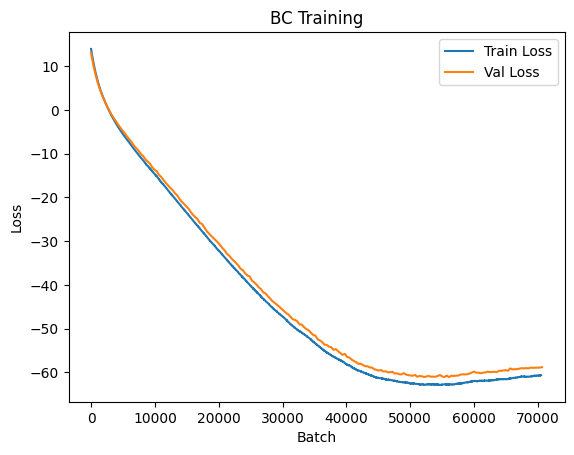

In [40]:
# plot_smoothed([losses[i][0] for i in range(len(losses))], window=1000, label="VL", xlabel="Batch", ylabel="Loss", title="IQL Training")
# plot_smoothed([losses[i][1] for i in range(len(losses))], window=1000, label="QL", xlabel="Batch", ylabel="Loss", title="IQL Training")
# plot_smoothed([losses[i][2] for i in range(len(losses))], window=500, label="PL", xlabel="Batch", ylabel="Loss", title="IQL Training")
plot_smoothed([losses[i] for i in range(len(losses))], window=500, label="Train Loss", xlabel="Batch", ylabel="Loss", title="BC Training")
plt.plot([i*355 for i in range(len(val_losses))], val_losses, label="Val Loss")
plt.legend()

In [42]:
# Save the trained model
torch.save(agent.policy_net.state_dict(), "checkpoint_final/bc_5.pth")
# torch.save(agent.policy_net.state_dict(), "fox_5.pth")
# print("Model saved to trained_policy.pth")
